In [4]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams[ 'font.sans-serif'] =[ 'Microsoft YaHei']

In [5]:
def GrawGraphic(file):
    txt = open(file, 'r')
    lines = txt.readlines()
    sigs = []
    quant = []
    
    for line in lines:
        line = line.replace("[", "")
        line = line.replace("]", "")
        line = line.replace("{", "")
        line = line.replace("}", "")
        line = line.replace("'", "")
        line = line.replace("\n", "")
        line = line.split(",")
#         print(line)
        sigs.append(line[0])
        quant.append(int(line[1]))
#     print(sigs)
#     print(quant)
#     print(len(quant))

    labels = sigs
    height = quant
    left = range(len(labels))

    plt.bar(left, height, alpha=0.6)  ## left=X軸數據， height=y軸數據
    plt.xlabel('brands')
    plt.ylabel('exist_number')
    plt.title('Sigrates')
#     plt.xticks(left, labels)    ## x軸顯示中文標籤
    plt.ylim([0,100])

    for x, y in enumerate(height):
        plt.text(x,y,'%s'%y,ha='center',fontsize=4)

    plt.savefig("Count_all_Label.png", dpi=300)
    plt.show()
    


In [3]:
def PickLessFromAll(file, Ori, Dest):
    txt2 = open(file, "r")
    lines = txt2.readlines()
    Dicts = {}
    OriImgs = os.listdir(Ori)
    DestList = []
    
    ### 做字串分割，留下所需資訊  ex: ['0Dunhill_gold_s,52, ', 'DSC_7623.txt,DSC_5772.txt,DSC_5770.txt, ....]
    for line in lines:
        line = line.replace("[", "")
        line = line.replace("]", "")
        line = line.replace("}", "")
        line = line.replace("'", "")
        line = line.replace(" ", "")
        line = line.replace("\n", "")
        line = line.split("{")
        cls_name = line[0]
#         print(line)
        if cls_name not in Dicts.keys():
            dic = {cls_name : line[1]}
            Dicts.update(dic)
#     print(Dicts)
    keys = Dicts.keys()
    text = ""
    
    for i in keys:
        splt_i = i.split(",")
        nums = int(splt_i[1])   ## key變成: ['0 Dunhill_gold_s],[52],[]' 擷取[1]數量的部分做挑選
        if nums < 10:           ## 出現再資料集內次數 < 10 的類別挑出其照片
            tmp_text = Dicts.get(i) + ","  ## 每段尾部加 ','便於切割字串
            text = text+tmp_text
            
    text = text.split(",")
    for i in text:
        if i == "": text.remove(i)
    print("含有num<10的所有檔案: ", len(text))
    new_text = list(dict.fromkeys(text))  ## 去除List內重複的內容
    print("去除重複檔名檔案數: ", len(new_text))
    
    ## 複製 num < 10 的照片到指定 Folder做 Rciap 擴增資料
    for t in new_text:
        t = t.strip(".txt")
        tjpg = t+".jpg"
        tJPG = t+".JPG"
        if tjpg in OriImgs:
            DestList.append(tjpg)
            shutil.copyfile(OriImg+tjpg, DestPth+tjpg)
        elif tJPG in OriImgs:
            DestList.append(tJPG)
            shutil.copyfile(OriImg+tJPG, DestPth+tJPG)
    print("含有num<10的所有照片: ", len(DestList))
    
    
    

In [23]:
## 挑出訓練集中需做 Ricap 的 Images 再 label
def PickLessForTrain(TrainPath, sourceRoot, DestRoot):
    bigSource = sourceRoot + "big\\"
    smlSource = sourceRoot + "small\\"
    bigDest = DestRoot + "big\\"
    smlDest = DestRoot + "small\\"
    
    Trains = os.listdir(TrainPath)
    bigs = os.listdir(bigSource)
    smls = os.listdir(smlSource)
    train_bigs = [item for item in bigs if item in Trains]  ## bigs 與train dataset 交集的IImages
    train_smls = [item for item in smls if item in Trains]  ## smls 與train dataset 交集的IImages
#     print(len(train_bigs))
#     print(len(train_smls))

    ## 挑出訓練集中需做 Ricap 的 Images
    for i in train_bigs:
        shutil.copyfile(bigSource+i, bigDest+i)
        
    for i in train_smls:
        shutil.copyfile(smlSource+i, smlDest+i)
        

In [15]:
def PrintLess(file):
    txt3 = open(file, 'r')
    lines = txt3.readlines()
    Dicts = {}
    for line in lines:
        line = line.replace("[", "")
        line = line.replace("]", "")
        line = line.split(",")
        cls_name = line[0]
        cls_num = int(line[1])
        if cls_num< 10:
            print(cls_name ,":", cls_num)
    

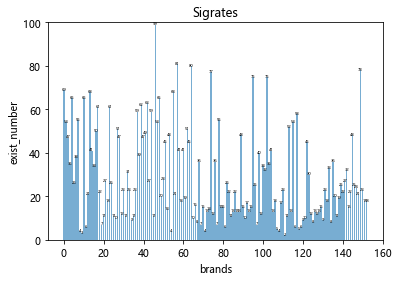

In [6]:
if __name__ == "__main__":
    OriImg = "C:\\Users\\user\\Desktop\\Class\\Cigarette_Brand\\Picture\\Cargo_Pic\\20200827_summarize\\Original03+05\\Pic\\Original_Datas\\current_total\\"
    DestPth = "C:\\Users\\user\\Desktop\\Class\\Cigarette_Brand\\Picture\\Cargo_Pic\\20200827_summarize\\Original03+05\\Pic\\1231_Ori+YUV+Rot\\Train_pics\\Ricap\\"
    sourcePath = "..\\pics\\sigrates\\"
    TrainDSet = "C:\\Users\\user\\Desktop\\Class\\Cigarette_Brand\\Picture\\Cargo_Pic\\20200827_summarize\\Original03+05\\Pic\\1231_Ori+YUV+Rot\\Train_pics\\Ori\\"
    
    AllTxt = "cls_files_Currentall.txt"
    GrawGraphic(AllTxt)
#     PickLessFromAll(AllTxt, OriImg, DestPth)
#     PrintLess(AllTxt)
#     PickLessForTrain(TrainDSet, sourcePath, DestPth)
    